# Edge detection of fishing net

In [3]:
%matplotlib inline
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
  
opencv image -> BGR not RBG  
so we need to change its order

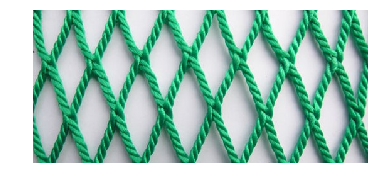

(243, 534, 3)


In [16]:
filename = "./data/Untorn_for aug/Untorn (7).png" 
plt.axis("off")
img = cv2.imread(filename, -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(img.shape)

saving_size = [640, 480]

## Gaussian image filtering
we will use Canny edge detection algorithm, but it is susceptible to noise.  
So, the image is needed to reduce noise using filter (blur)  
- 5x5 Gaussian blur

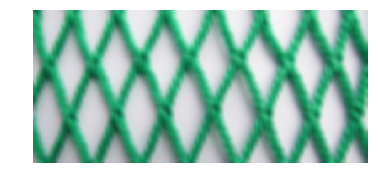

In [5]:
blur = cv2.GaussianBlur(img, (11,11), 7, 7)
plt.axis("off")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## Canny edge detection

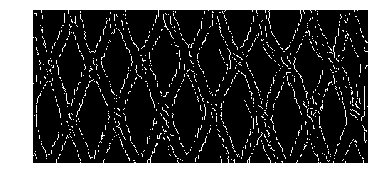

In [6]:
edges = cv2.Canny(blur, 68, 10)
plt.axis("off")
plt.imshow(edges, cmap="gray")
plt.show()

In [7]:
# For further usage
#cedges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
cedges = np.copy(img)
cedgesP = np.copy(cedges)

## Contour detection
For accuracy, use binary image (Canny edge detection outs binary image)

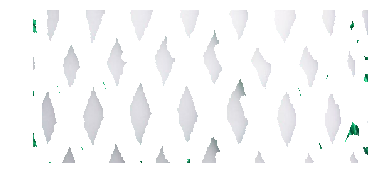

In [8]:
cont_width = 15

temp = img
con_img, contours, hierachy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
con_img = cv2.drawContours(temp, contours, -1, (255,255,255), cont_width)

plt.axis("off")
plt.imshow(cv2.cvtColor(con_img, cv2.COLOR_BGR2RGB))
plt.show()

#cv2.imwrite(filename, con_img)

# Background Inpainting

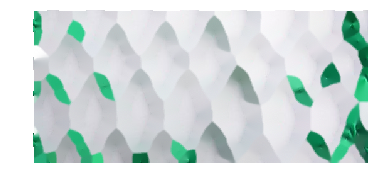

In [9]:
# Make black image for mask

blank_img = np.zeros((img.shape[0],img.shape[1], 1), np.uint8)
masks = cv2.drawContours(blank_img, contours, -1, (255,255,255), cont_width)

new_img = cv2.inpaint(con_img, masks, 3, cv2.INPAINT_TELEA)

plt.axis("off")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

## Deleting randomly

Use ellipse to specify deleting area  
The center of ellipse is randomly selected from the contours (net position)  
Other parameters of the ellipse are also chosen arbitrarily (uniform distribution)  


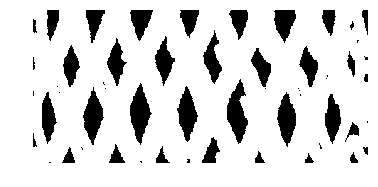

In [10]:
# circle? drawing? how can make a set of continous random pixels?

plt.axis("off")
plt.imshow(cv2.cvtColor(masks, cv2.COLOR_GRAY2RGB))
plt.show()

In [11]:
mask_idx = np.where(masks == 255)
y = np.array(mask_idx[0])
x = np.array(mask_idx[1])

## Generating

sample_num is the number of data which will be generated

In [18]:
sample_num = 100

for num in range(sample_num):
    blank_img2 = np.zeros((img.shape[0],img.shape[1], 1), np.uint8)

    # random ellipse center inside the image
    # Image shape -> Y, X, Channel
    # But when we draw something, X, Y coordinate
    center = np.array((int(np.random.choice(x, size=1)), int(np.random.choice(y, size=1))))

    minaxis = 11
    maxaxis = 200
    ax_flag = True

    while ax_flag is True:
        temp_ax = np.array((np.random.randint(minaxis, maxaxis, size=1), np.random.randint(minaxis, maxaxis, size=1)))

        if temp_ax[0] is not temp_ax[1]:
            ax_flag = False
    temp_ax = np.sort(temp_ax, axis=0)
    axes = np.array((temp_ax[1], temp_ax[0]))

    angle = np.random.randint(180, size=1)


    startA = np.random.randint(360, size=1)
    endA = startA + np.random.randint(360, size=1)
    if endA > 360:
        endA = endA - 360



    masks2 = cv2.ellipse(blank_img2, (center[0], center[1]), (axes[0], axes[1]), angle, startA, endA, (255,255,255), -1)
    
    white_idx = np.where(masks2 == 255)

    
    masks3 = np.zeros((img.shape[0],img.shape[1], 1), np.uint8)

    for i in range(0, len(white_idx[0])):
        if masks[white_idx[0][i], white_idx[1][i], 0] == 255:
            masks3[white_idx[0][i], white_idx[1][i], 0] = 255
    
    # Make black image for mask
    width = 12
    height = 12
    
    test22 = cv2.imread(filename, -1)

    new_img = cv2.inpaint(test22, masks3, 3, cv2.INPAINT_TELEA)
    
    re_size = cv2.resize(new_img, (saving_size[0], saving_size[1]), interpolation=cv2.INTER_CUBIC)
    

    # Image saving
    save_path = "./data/Untorn_gen/untorn1-%d.png" % num
    cv2.imwrite(save_path, re_size)